In [11]:
import numpy as np
import pandas as pd
import torch
import pymol
from pymol import cmd
import os, time, sys, pickle
from collections import defaultdict
from sklearn.metrics import pairwise_distances
from collections import defaultdict
import torch

### 0. Define dataset parameters

In [65]:
da = 4
scpdb_path = '/data/lishuya/software/scPDB/'

outdir = './PocketDetectionData_scPDB_da{}/'.format(da)
if not os.path.exists(outdir):
    os.mkdir(outdir)

### 1. Load dataset files

In [3]:
deepsurf_list = []
with open('lists/deepsurf_scPDB.txt', 'r') as f:
    for line in f.readlines():
        deepsurf_list.append(line.strip())
len(deepsurf_list)

9444

In [4]:
pdbid_chain_dict = {}
with open('lists/pdbid_chain_list_scPDB.txt') as f:
    for line in f.readlines():
        pdbid, chains = line.strip().split('_')
        pdbid_chain_dict[pdbid] = chains
len(pdbid_chain_dict)

9442

In [5]:
pdbid_to_folder = defaultdict(lambda: [])
for fname in os.listdir(scpdb_path):
    pdbid_to_folder[fname[:4]].append(fname)
len(pdbid_to_folder)

16612

### 2. Get protein features

In [6]:
anchor_dict = {}
i = 0
total = len(pdbid_chain_dict)
t1 = time.time()

for pdbid in pdbid_chain_dict:
    chains = pdbid_chain_dict[pdbid]
    i += 1
    print('{}/{}, time {:.2f} s\r'.format(i, total, time.time()-t1), end="")

    try:
        anchor_dict[pdbid] = np.load('AnchorOutput/{}_{}_da_{}/anchors.npy'.format(pdbid, chains, da))[0]
    except:
        pass

print("\nanchor_dict", len(anchor_dict))

9442/9442, time 109.02 s
anchor_dict 9436


In [66]:
atom_dict = {}

i = 0
t1 = time.time()
total = len(pdbid_chain_dict)
for pdbid in pdbid_chain_dict:
    chains = pdbid_chain_dict[pdbid]
    i += 1
    print('{}/{}, time {:.2f} s\r'.format(i, total, time.time()-t1), end="")

    try:
        repeat_list = pickle.load(open('AnchorOutput/{}_{}_da_{}/atom_feature.pk'\
                                          .format(pdbid, chains, da), 'rb'))[0]
        assert len(repeat_list[0]) != 0
        atom_dict[pdbid] = repeat_list
    except:
        pass
len(atom_dict)

9238

In [67]:
with open(outdir+'atom_feature_coord_nei_dict_thre'+str(da), "wb") as f:
    pickle.dump(atom_dict, f)

In [10]:
# for pdbid in atom_dict:
#     if len(atom_dict[pdbid][0]) == 0:
#         print(pdbid)
# # atom_dict[pdbid]

In [8]:
masif_feature_coord_nei_dict = {}
i = 0
t1 = time.time()

for pdbid in pdbid_chain_dict:
    chains = pdbid_chain_dict[pdbid]
    i += 1
    print('{}/{}, time {:.2f} s\r'.format(i, total, time.time()-t1), end="")

    try:
        masif_feature = np.load('AnchorOutput/{}_{}_da_{}/masif_feature.npy'.format(pdbid, chains, da))
        masif_neighbor = np.load('AnchorOutput/{}_{}_da_{}/masif_neighbor.npy'.format(pdbid, chains, da))
        masif_coords = []
        masif_feature_coord_nei_dict[pdbid] = (masif_feature, masif_coords, masif_neighbor)
    except:
        pass
len(masif_feature_coord_nei_dict)

9239

In [9]:
am_dict = {}
aa_dict = {}
at_dict = {}
i = 0
t1 = time.time()

for pdbid in pdbid_chain_dict:
    chains = pdbid_chain_dict[pdbid]
    i += 1
    if i % 100 == 0:
        print('{}/{}, time {:.2f} s\r'.format(i, total, time.time()-t1), end="")
    try:  
        am = torch.load('AnchorOutput/{}_{}_da_{}/am_list.pt'.format(pdbid, chains, da))[0]
        at = torch.load('AnchorOutput/{}_{}_da_{}/at_list.pt'.format(pdbid, chains, da))[0]
        aa = torch.load('AnchorOutput/{}_{}_da_{}/aa_list.pt'.format(pdbid, chains, da))[0]
        am_dict[pdbid] = am
        at_dict[pdbid] = at
        aa_dict[pdbid] = aa
    except Exception as E:
        print(pdbid, E)
        print(
            os.path.exists('AnchorOutput/{}_{}_da_{}/am_list.pt'.format(pdbid, chains, da)), 
            os.path.exists('AnchorOutput/{}_{}_da_{}/at_list.pt'.format(pdbid, chains, da)), 
            os.path.exists('AnchorOutput/{}_{}_da_{}/aa_list.pt'.format(pdbid, chains, da)), 
             )
        pass
    
print('\n', len(am_dict), len(aa_dict), len(at_dict))

1eii [Errno 2] No such file or directory: 'AnchorOutput/1eii_A_da_8/am_list.pt'
False False False
1gzu [Errno 2] No such file or directory: 'AnchorOutput/1gzu_ABC_da_8/am_list.pt'
False False False
1h35 [Errno 2] No such file or directory: 'AnchorOutput/1h35_C_da_8/am_list.pt'
False False False
1h48 [Errno 2] No such file or directory: 'AnchorOutput/1h48_DEF_da_8/am_list.pt'
False False False
1h7u [Errno 2] No such file or directory: 'AnchorOutput/1h7u_A_da_8/am_list.pt'
False False False
1h8h [Errno 2] No such file or directory: 'AnchorOutput/1h8h_ABCDEFG_da_8/am_list.pt'
False True True
1hwz [Errno 2] No such file or directory: 'AnchorOutput/1hwz_ABCDEF_da_8/am_list.pt'
False False False
1kp8 [Errno 2] No such file or directory: 'AnchorOutput/1kp8_ABCDEFGHIJKLMN_da_8/am_list.pt'
False False False
1mab [Errno 2] No such file or directory: 'AnchorOutput/1mab_ABG_da_8/am_list.pt'
False False False
1o6q [Errno 2] No such file or directory: 'AnchorOutput/1o6q_C_da_8/am_list.pt'
False Fals

2j9f [Errno 2] No such file or directory: 'AnchorOutput/2j9f_ABCD_da_8/am_list.pt'
False False False
2jae [Errno 2] No such file or directory: 'AnchorOutput/2jae_AB_da_8/am_list.pt'
False False False
2jb1 [Errno 2] No such file or directory: 'AnchorOutput/2jb1_AB_da_8/am_list.pt'
False False False
2jb2 [Errno 2] No such file or directory: 'AnchorOutput/2jb2_AB_da_8/am_list.pt'
False False False
2jg3 [Errno 2] No such file or directory: 'AnchorOutput/2jg3_DEF_da_8/am_list.pt'
False False False
2kwi [Errno 2] No such file or directory: 'AnchorOutput/2kwi_AB_da_8/am_list.pt'
False False False
2ldb [Errno 2] No such file or directory: 'AnchorOutput/2ldb_ABCD_da_8/at_list.pt'
True False False
2nmv [Errno 2] No such file or directory: 'AnchorOutput/2nmv_ABD_da_8/am_list.pt'
False False False
2ogi [Errno 2] No such file or directory: 'AnchorOutput/2ogi_AB_da_8/am_list.pt'
False False False
2pdt [Errno 2] No such file or directory: 'AnchorOutput/2pdt_B_da_8/am_list.pt'
False False False
2q3o [

4d79 [Errno 2] No such file or directory: 'AnchorOutput/4d79_CD_da_8/am_list.pt'
False False False
4d7m [Errno 2] No such file or directory: 'AnchorOutput/4d7m_A_da_8/am_list.pt'
False False False
4d81 [Errno 2] No such file or directory: 'AnchorOutput/4d81_A_da_8/at_list.pt'
True False False
4dya [Errno 2] No such file or directory: 'AnchorOutput/4dya_B_da_8/am_list.pt'
False False False
4dyb [Errno 2] No such file or directory: 'AnchorOutput/4dyb_B_da_8/am_list.pt'
False False False
4egb [Errno 2] No such file or directory: 'AnchorOutput/4egb_EF_da_8/am_list.pt'
False False False
4fnc [Errno 2] No such file or directory: 'AnchorOutput/4fnc_ACD_da_8/am_list.pt'
False False False
4gdc [Errno 2] No such file or directory: 'AnchorOutput/4gdc_ABCD_da_8/am_list.pt'
False False False
4gdd [Errno 2] No such file or directory: 'AnchorOutput/4gdd_ABCD_da_8/am_list.pt'
False False False
4itr [Errno 2] No such file or directory: 'AnchorOutput/4itr_ABCD_da_8/am_list.pt'
False True True
4j6b [Errn

In [10]:
with open(outdir+'anchor_dict_thre'+str(da), 'wb') as f:
    pickle.dump(anchor_dict, f)
    
with open(outdir+'atom_feature_coord_nei_dict_thre'+str(da), "wb") as f:
    pickle.dump(atom_dict, f)

with open(outdir+'masif_feature_coord_nei_dict', 'wb') as f:
    pickle.dump(masif_feature_coord_nei_dict, f)
    
with open(outdir+'am_dict', 'wb') as f:
    pickle.dump(am_dict, f)
    
with open(outdir+'aa_dict', 'wb') as f:
    pickle.dump(aa_dict, f)
    
with open(outdir+'at_dict', 'wb') as f:
    pickle.dump(at_dict, f)

### 3. get label

In [11]:
def get_ligand_counts_coords(pdbid, chains, removeHs=True):
    if os.path.exists('MasifOutput/00-raw_pdbs/fixed_{}.pdb'.format(pdbid)):
        filename = 'MasifOutput/00-raw_pdbs/fixed_{}.pdb'.format(pdbid)
        protein = 'fixed_'+pdbid
    elif os.path.exists('MasifOutput/00-raw_pdbs/{}.pdb'.format(pdbid)):
        filename = 'MasifOutput/00-raw_pdbs/{}.pdb'.format(pdbid)
        protein = pdbid
    else:
        print("NO pdb file", pdbid)
        return None
#     print(filename)
    pymol.cmd.reinitialize()
    cmd.load(filename)
    for folder in pdbid_to_folder[pdbid]:
        cmd.load(scpdb_path+'{}/ligand.mol2'.format(folder))
    if removeHs:
        pymol.cmd.remove('hydro')
    protein_coords = []
    pymol.cmd.iterate_state(-1, "{} and chain {} and not het".format(protein, '+'.join(chains)),
                            "protein_coords.append((x,y,z))", space=locals())
    ligand_list = set()
    pymol.cmd.iterate('ligand*', 'ligand_list.add(resn)', space=locals())    
#     print('ligand_list', ligand_list)
    count_dict, coord_dict = {}, {}
    list_tabu = ["HOH", "DOD", "WAT", "NAG", "MAN", "GLC", "ABA", "MPD", "GOL", "SO4", "PO4", '', 'U', 'HEM', 'PI']
    list_ligand_ok = set()
    for ligand in ligand_list:
        if ligand in list_tabu:
            continue
        resi_set = set()
        ligand = ligand.upper()
        pymol.cmd.iterate('resname {}'.format(ligand), "resi_set.add(chain+'_'+resi)", space=locals())
#         print('resi_set', resi_set)
        count_dict[ligand] = 0
        for chain_resi in resi_set:
            chain, resi = chain_resi.split('_')
            pymol.cmd.select('{}_{}'.format(ligand, chain_resi), 'chain {} and resi {}'.format(chain, resi))
            coords = []
            pymol.cmd.iterate_state(-1, '{}_{}'.format(ligand, chain_resi), "coords.append((x,y,z))", space=locals())
            if len(coords) < 5:
                continue
            coords = np.array(coords) 
#             print('coords', np.max(coords, 0), np.min(coords, 0))
#             print(len(protein_coords), len(coords), pairwise_distances(protein_coords, coords).min())
            
            if pairwise_distances(protein_coords, coords).min() < 1.5:
                continue
            if pairwise_distances(protein_coords, coords).min() > 4:
                continue
            if pairwise_distances(protein_coords, np.mean(coords, 0, keepdims=True)).min() > 5.5:
                continue
            coord_dict['{}_{}'.format(ligand, chain_resi)] = coords
            count_dict[ligand] += 1
            list_ligand_ok.add(ligand)
    return count_dict, coord_dict, list(list_ligand_ok)

In [12]:
# pdbid = '3uzx'
# scpdb_path+'{}/ligand.mol2'.format(pdbid_to_folder[pdbid])

In [13]:
# get_ligand_counts_coords('3uzx', 'B')

In [14]:
# pdbid_chain_dict['3uzx']

In [15]:
i = 0
total = len(anchor_dict)
t1 = time.time()

count_dict_all = {}
coord_dict_all = {}
for pdbid in anchor_dict:
    i += 1
    chains = pdbid_chain_dict[pdbid]
    print('{}/{}, time {:.2f} s\r'.format(i, total, time.time()-t1), end="")
    try:
        count_dict, coord_dict, list_ligand = get_ligand_counts_coords(pdbid, list(chains))
        if len(list_ligand) == 0:
            print('\nNO LIGAND {} {}'.format(i, pdbid))
            continue
        count_dict_all[pdbid] = count_dict
        coord_dict_all[pdbid] = coord_dict
    except Exception as E:
        print('\n{} {} {}'.format(i, pdbid, E))
print('count_dict_all', len(count_dict_all), 'coord_dict_all', len(coord_dict_all))

 PyMOL not running, entering library mode (experimental)
557/9436, time 130.74 s
NO LIGAND 557 1rml
1984/9436, time 289.65 s
NO LIGAND 1984 2iyf
1992/9436, time 290.13 s
NO LIGAND 1992 2j0d
2092/9436, time 306.08 s
NO LIGAND 2092 2kwi
2111/9436, time 310.70 s
NO LIGAND 2111 2mse
2254/9436, time 325.67 s
NO LIGAND 2254 2oxn
2964/9436, time 404.80 s
NO LIGAND 2964 2xup
3361/9436, time 440.16 s
NO LIGAND 3361 3au2
3550/9436, time 459.43 s
NO LIGAND 3550 3ck7
4720/9436, time 591.93 s
NO LIGAND 4720 3nu5
5108/9436, time 636.79 s
NO LIGAND 5108 3r0y
5401/9436, time 671.98 s
NO LIGAND 5401 3tfj
5415/9436, time 673.73 s
NO LIGAND 5415 3tjs
5524/9436, time 686.53 s
NO LIGAND 5524 3ug8
5526/9436, time 686.60 s
NO LIGAND 5526 3ugr
5923/9436, time 742.58 s
NO LIGAND 5923 3zhz
6727/9436, time 842.27 s
NO LIGAND 6727 4ef4
6867/9436, time 859.53 s
NO LIGAND 6867 4f9g
7373/9436, time 926.11 s
NO LIGAND 7373 4ig8
7857/9436, time 1002.09 s
NO LIGAND 7857 4lnb
7924/9436, time 1013.72 s
NO LIGAND 7924 4m8

In [16]:
# total number of ligands -- single

a = 0
for x in count_dict_all.values():
    a += sum(x.values())
a

17244

In [17]:
len(count_dict_all)

9409

### 3.2 get anchor labels

In [18]:
# single

label_dict_single = {}
processed = 0

for pdbid in count_dict_all:
    count_dict = count_dict_all[pdbid]
    print(processed, " \r", end='')
    ligand_coords = coord_dict_all[pdbid]
    anchor_coords = anchor_dict[pdbid]
    cpd_coords = np.concatenate(list(ligand_coords.values()), axis=0)
    ag = pairwise_distances(anchor_coords, cpd_coords).min(axis=1)
    label = (ag <= 4).astype(int)
    label_dict_single[pdbid] = label
    processed += 1

len(label_dict_single)

9409

In [19]:
with open(outdir+'label_dict_single', 'wb') as f:
    pickle.dump(label_dict_single, f)

### 4. Save final dataset table

In [68]:
# with open(outdir+'anchor_dict_thre'+str(da), 'rb') as f:
#     anchor_dict = pickle.load(f)
    
# with open(outdir+'atom_feature_coord_nei_dict_thre'+str(da), "rb") as f:
#     atom_dict = pickle.load(f)

# with open(outdir+'masif_feature_coord_nei_dict', 'rb') as f:
#     masif_feature_coord_nei_dict = pickle.load(f)
    
# with open(outdir+'am_dict', 'rb') as f:
#     am_dict = pickle.load(f)
    
# with open(outdir+'aa_dict', 'rb') as f:
#     aa_dict = pickle.load(f)
    
# with open(outdir+'at_dict', 'rb') as f:
#     at_dict = pickle.load(f)

In [69]:
# with open(outdir+'label_dict_single', 'rb') as f:
#     label_dict_single = pickle.load(f)

In [70]:
# tmp = pd.read_csv('./PocketDetectionData_scPDB_da4/scPDB_table_pocket_single.tsv', sep='\t')
# tmp_dict = {}
# for i in tmp.index:
#     pdbid, count, ligand = tmp.loc[i, ['pdbid', 'num_ligand', 'ligand']]
#     tmp_dict[pdbid] = (count, ligand)
# len(tmp_dict)

9209

In [71]:
i = 0
total = len(list(anchor_dict.keys()))
t1 = time.time()

pdbid_list = []
ligand_list = []
num_ligand_list = []

for pdbid in list(anchor_dict.keys()):
    i += 1
#     print('{}/{}, time {:.2f} s\r'.format(i, total, time.time()-t1), end="")
    chains = pdbid_chain_dict[pdbid]

#     if pdbid not in tmp_dict:
#         continue
#     num_ligands, ligands = tmp_dict[pdbid]
    if pdbid not in count_dict_all:
        continue
    count_dict = count_dict_all[pdbid]
    ligands = ','.join(list(count_dict.keys()))
    num_ligands = sum(count_dict.values())
    
    if pdbid not in anchor_dict:
        continue
    if pdbid not in atom_dict:
        continue  
    if pdbid not in masif_feature_coord_nei_dict:
        continue  
    if pdbid not in am_dict:
        continue  
    if pdbid not in at_dict:
        continue  
    if pdbid not in aa_dict:
        continue     
    if pdbid not in label_dict_single:
        continue  
    pdbid_list.append(pdbid)
    ligand_list.append(ligands)
    num_ligand_list.append(num_ligands)
    
len(pdbid_list), len(ligand_list), len(num_ligand_list)

(9209, 9209, 9209)

In [72]:
table_single = pd.DataFrame()
table_single['pdbid'] = pdbid_list
table_single['ligand'] = ligand_list
table_single['num_ligand'] = num_ligand_list
table_single['chains'] = [pdbid_chain_dict[pdbid] for pdbid in pdbid_list]

table_single.to_csv(outdir+'scPDB_table_pocket_single.tsv', sep='\t', index=None)

### Calculate protein similarity

In [22]:
def get_fasta_str(pdbid, chains=None, removeHs=True, debug=False):
    if os.path.exists('MasifOutput/00-raw_pdbs/fixed_{}.pdb'.format(pdbid)):
        filename = 'MasifOutput/00-raw_pdbs/fixed_{}.pdb'.format(pdbid)
        protein = 'fixed_'+pdbid
    elif os.path.exists('MasifOutput/00-raw_pdbs/{}.pdb'.format(pdbid)):
        filename = 'MasifOutput/00-raw_pdbs/{}.pdb'.format(pdbid)
        protein = pdbid
    else:
        print("NO pdb file", pdbid)
        return None
    
    pymol.cmd.reinitialize()
    pymol.cmd.load(filename)
    fasta_str = pymol.cmd.get_fastastr(protein + ' and chain '+chains)
    if len(fasta_str) == 0:
        return None
    
    fasta_str = fasta_str.replace('?', 'X')
    # print(fasta_str)
    seq_dict = {}
    for i, s in enumerate(fasta_str.split('\n')):
        if s.startswith('>'):
            name = s
            if i != 0:
                seq_dict[name] = seq
            seq = ""
        else:
            seq += s 
    seq_dict[name] = seq
    
    seq_set = set()
    new_fasta_str = ""
    for name, seq in seq_dict.items():
        if seq not in seq_set and len(seq) >= 15:
            new_fasta_str += name + '\n' + seq + '\n'
            seq_set.add(seq)
    
    if len(new_fasta_str) == 0:
        return None
    else:
        return new_fasta_str

In [23]:
if da==4:
    fw = open('coach420_seq.fasta', 'w')
    coach_table = pd.read_csv('PocketDetectionData_COACH420_da6/coach420_table_pocket_full.tsv', sep='\t')
    print(coach_table.shape)
    done = set()
    for i in coach_table.index:
        print('{}/{}\r'.format(i, len(coach_table)), end="")
        pdbid, chains = coach_table.loc[i, ['pdbid', 'eval_chains']]
        if pdbid not in done:
            done.add(pdbid)
        else:
            continue
        fasta_str = get_fasta_str(pdbid, chains)
        if fasta_str is not None:
            fw.write(fasta_str)
    # fw.write('\n')
    fw.close()
else:
    pass

In [24]:
if da==4:
    holo_table = pd.read_csv('PocketDetectionData_HOLO4k_da6/holo4k_table_pocket_full.tsv', sep='\t')
    print(holo_table.shape)
    fw = open('holo4k_seq.fasta', 'w')

    done = set()
    for i in holo_table.index:
        print('{}/{}\r'.format(i, len(holo_table)), end="")
        pdbid, chains = holo_table.loc[i, ['pdbid', 'chains']]
        if pdbid not in done:
            done.add(pdbid)
        else:
            continue
        fasta_str = get_fasta_str(pdbid, chains)
        if fasta_str is not None:
            fw.write(fasta_str)
    # fw.write('\n')
    fw.close()
else:
    pass

In [25]:
if da==4:
    fw = open('scpdb_seq.fasta', 'w')

    done = set()
    for i in table_single.index:
        print('{}/{}\r'.format(i, len(table_single)), end="")
        pdbid, chains = table_single.loc[i, ['pdbid', 'chains']]
        if pdbid not in done:
            done.add(pdbid)
        else:
            continue
        fasta_str = get_fasta_str(pdbid, chains)
        if fasta_str is not None:
            fw.write(fasta_str)
    # fw.write('\n')
    fw.close()
else:
    pass

In [26]:
! mv *.fasta ./smith-waterman-src/

mv: 无法获取'*.fasta' 的文件状态(stat): 没有那个文件或目录


\# Then run in cmdline:

cd ./smith-waterman-src/

chmod +x ssw_test

./ssw_test -p coach420_seq.fasta scpdb_seq.fasta > coach_scpdb.out & 

./ssw_test -p holo4k_seq.fasta scpdb_seq.fasta > holo_scpdb.out &

python pyssw_paired.py -p coach420_seq.fasta coach420_seq.fasta > coach.out

python pyssw_paired.py -p holo4k_seq.fasta holo4k_seq.fasta > holo.out

python pyssw_paired.py -p scpdb_seq.fasta scpdb_seq.fasta > scpdb.out

\# When finishing the above 5 jobs:

In [73]:
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)

def get_protein_vocabulary_dict(fasta_name):
    protein_vocabulary_dict = {}
    f = open(fasta_name)
    for line in f.readlines():
        if line[0] == '>':
            protein_vocabulary_dict[line[1:-1]] = len(protein_vocabulary_dict)
    f.close()
    print('protein_vocabulary_dict', len(protein_vocabulary_dict))
    return protein_vocabulary_dict

def sim_aquire(target_name, query_name, output_name):
    '''without normalization'''
    target_dict = get_protein_vocabulary_dict(target_name)
    query_dict = get_protein_vocabulary_dict(query_name)
    p_simi = np.zeros((len(target_dict), len(query_dict)))
    
    # parse results
    f = open(output_name)
    content = f.read()
    content = content.replace("When maskLen < 15, the function ssw_align doesn't return 2nd best alignment information.\n", "")
    content = content.replace("269\n\n\n", "")
    lines = content.split('\n')[:-1] ## ???? 不懂但有用
#     lines = f.readlines()
#     lines = [line for line in lines if not line.startswith('When ')]
    f.close()
    print('total lines', len(lines), len(lines)/4/p_simi.size)
    for i in range(0,len(lines),4):
        try:
            a = lines[i].strip('\n').split(' ')[-1]
            b = lines[i+1].strip('\n').split(' ')[-1]
            c = float(int(lines[i+2].strip('\n').split( )[1]))
            p_simi[target_dict[a], query_dict[b]] = c
        except Exception as E:
            print(lines[i-4:i+4])
            print('wrong', i, a, b, c)
            print(E)
            return
            
#     assert check_symmetric(p_simi)
    
    # normalize
#     for i in range(p_simi.shape[0]):
#         for j in range(p_simi.shape[0]):
#             if i == j:
#                 continue
#             p_simi[i,j] = p_simi[i,j] / (float(np.sqrt(p_simi[i,i])*np.sqrt(p_simi[j,j]))+1e-12)
#     for i in range(len(p_simi)):
#         p_simi[i,i] = p_simi[i,i] / float(np.sqrt(p_simi[i,i])*np.sqrt(p_simi[i,i]))
#     print('p_simi', p_simi.shape)
#     assert check_symmetric(p_simi)
    
    target_list = ['']*len(target_dict)
    for pid, idx in target_dict.items():
        target_list[idx] = pid
    print('target_list', len(target_list))
    
    query_list = ['']*len(query_dict)
    for pid, idx in query_dict.items():
        query_list[idx] = pid
    print('query_list', len(query_list))
    # assert target_list == query_list
    return p_simi, target_list, query_list


In [74]:
coach_scpdb_sim_mat, coach_list, scpdb_list = sim_aquire('./smith-waterman-src/coach420_seq.fasta', 
                                              './smith-waterman-src/scpdb_seq.fasta',
                                              './smith-waterman-src/coach_scpdb.out')
holo_scpdb_sim_mat, holo_list, scpdb_list = sim_aquire('./smith-waterman-src/holo4k_seq.fasta', 
                                              './smith-waterman-src/scpdb_seq.fasta',
                                              './smith-waterman-src/holo_scpdb.out')
coach_scpdb_sim_mat.shape, (coach_scpdb_sim_mat == 0).sum()

protein_vocabulary_dict 419
protein_vocabulary_dict 4464
total lines 7481664 1.0
target_list 419
query_list 4464
protein_vocabulary_dict 2011
protein_vocabulary_dict 4464
total lines 35908416 1.0
target_list 2011
query_list 4464


((419, 4464), 0)

In [75]:
def reg_aquire(target_list, output_name):
    p_simi = {} # np.zeros(len(target_dict))
    
    # parse results
    f = open(output_name)
    lines = f.readlines()
    f.close()
    print('total lines', len(lines))
    for i in range(0,len(lines),4):
        try:
            a = lines[i].strip('\n').split(' ')[-1]
            b = lines[i+1].strip('\n').split(' ')[-1]
            assert a==b
            c = float(int(lines[i+2].strip('\n').split( )[1]))
            p_simi[a] = c
        except:
            print(lines[i:i+4])
            print('wrong', i, a, b, c)
            
    res = []    
    for target in target_list:
        if target in p_simi:
            res.append(p_simi[target])
        else:
            res.append(0)
    
    return np.array(res)

In [76]:
coach_reg = reg_aquire(coach_list, './smith-waterman-src/coach.out')
holo_reg = reg_aquire(holo_list, './smith-waterman-src/holo.out')
scpdb_reg = reg_aquire(scpdb_list, './smith-waterman-src/scpdb.out')
print(coach_reg.shape, holo_reg.shape, scpdb_reg.shape)

total lines 1676
total lines 8044
total lines 17856
(419,) (2011,) (4464,)


In [77]:
coach_scpdb_sim_norm = np.zeros(coach_scpdb_sim_mat.shape)
for i in range(coach_scpdb_sim_mat.shape[0]):
    for j in range(coach_scpdb_sim_mat.shape[1]):
        coach_scpdb_sim_norm[i,j] = coach_scpdb_sim_mat[i,j] / (float(np.sqrt(coach_reg[i])*np.sqrt(scpdb_reg[j]))+1e-12)
print('coach_scpdb_sim_norm', coach_scpdb_sim_norm.shape)

coach_scpdb_sim_norm (419, 4464)


In [78]:
holo_scpdb_sim_norm = np.zeros(holo_scpdb_sim_mat.shape)
for i in range(holo_scpdb_sim_mat.shape[0]):
    for j in range(holo_scpdb_sim_mat.shape[1]):
        holo_scpdb_sim_norm[i,j] = holo_scpdb_sim_mat[i,j] / (float(np.sqrt(holo_reg[i])*np.sqrt(scpdb_reg[j]))+1e-12)
print('holo_scpdb_sim_norm', holo_scpdb_sim_norm.shape)

holo_scpdb_sim_norm (2011, 4464)


In [79]:
table_pdbid_list = table_single['pdbid'].values
table_pdbid_dict = {pdbid:i for i,pdbid in enumerate(table_pdbid_list)}
len(table_pdbid_list), len(table_pdbid_dict)

(9209, 9209)

In [80]:
maxsim_coach = np.zeros(len(table_pdbid_dict))
for coli, item in enumerate(scpdb_list):
    pdbid = item[:4]
    if pdbid not in table_pdbid_dict:
        continue
    idx = table_pdbid_dict[pdbid]
    maxsim = max(maxsim_coach[idx], coach_scpdb_sim_norm[:,coli].max())
    maxsim_coach[idx] = maxsim
np.mean(maxsim_coach)

0.14330859983664965

In [81]:
maxsim_holo = np.zeros(len(table_pdbid_dict))
for coli, item in enumerate(scpdb_list):
    pdbid = item[:4]
    if pdbid not in table_pdbid_dict:
        continue
    idx = table_pdbid_dict[pdbid]
    maxsim = max(maxsim_holo[idx], holo_scpdb_sim_norm[:,coli].max())
    maxsim_holo[idx] = maxsim
np.mean(maxsim_holo)

0.1722204401618667

In [82]:
maxsim_both = np.vstack([maxsim_holo, maxsim_coach]).max(0)
maxsim_both.shape

(9209,)

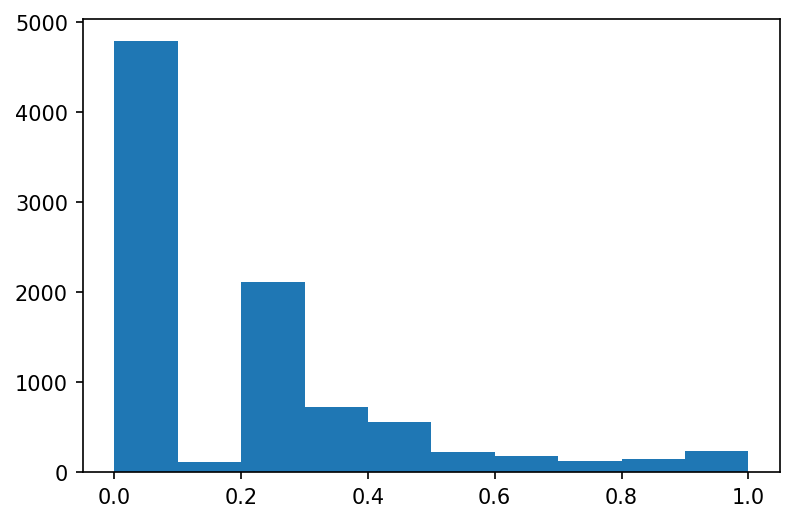

In [83]:
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(maxsim_both)
plt.show()

In [84]:
table_single['maxsim'] = maxsim_both

In [85]:
table_single['sim0.9'] = (maxsim_both <= 0.9).astype(bool)
table_single['sim0.8'] = (maxsim_both <= 0.8).astype(bool)
table_single['sim0.7'] = (maxsim_both <= 0.7).astype(bool)
table_single['sim0.6'] = (maxsim_both <= 0.6).astype(bool)
table_single['sim0.5'] = (maxsim_both <= 0.5).astype(bool)
table_single['sim0.4'] = (maxsim_both <= 0.4).astype(bool)
table_single['sim0.3'] = (maxsim_both <= 0.3).astype(bool)
table_single['sim0.2'] = (maxsim_both <= 0.2).astype(bool)

In [86]:
table_single.to_csv(outdir+'scPDB_table_pocket_single_similarity.tsv', sep='\t', index=None)

In [87]:
table_single

,pdbid,ligand,num_ligand,chains,maxsim,sim0.9,sim0.8,sim0.7,sim0.6,sim0.5,sim0.4,sim0.3,sim0.2
0,11bg,U2G,4,AB,0.000000,True,True,True,True,True,True,True,True
1,1a2n,TET,1,A,0.253156,True,True,True,True,True,True,True,False
2,1a4r,GNH,1,AB,0.000000,True,True,True,True,True,True,True,True
3,1a4z,NAD,4,ABCD,0.000000,True,True,True,True,True,True,True,True
4,1a5u,ATP,3,EFGH,0.000000,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9204,5xra,"CLR,FMN",2,A,0.589163,True,True,True,True,False,False,False,False
9205,6cox,S58,2,AB,0.000000,True,True,True,True,True,True,True,True
9206,6req,3CP,1,CD,0.000000,True,True,True,True,True,True,True,True
9207,7prc,CET,1,CHLM,0.000000,True,True,True,True,True,True,True,True


In [40]:
x = []
tag_list = ['sim0.2', 'sim0.3', 'sim0.4', 'sim0.5', 'sim0.6', 'sim0.7', 'sim0.8', 'sim0.9']
for sim in tag_list:
    x.append(table_single[sim].sum())
x

[4898, 7010, 7734, 8292, 8519, 8699, 8821, 8968]

Text(0.5, 1.0, 'num training samples')

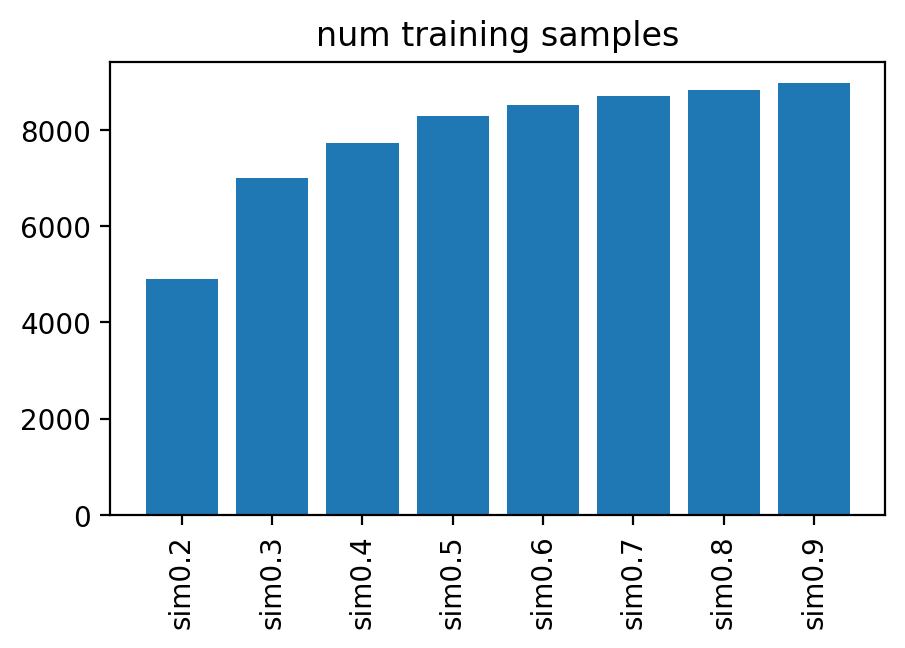

In [41]:
plt.figure(figsize=(5,3), dpi=200)
plt.bar(range(len(tag_list)), x)
plt.xticks(range(len(tag_list)), tag_list, rotation=90)
plt.title('num training samples')